In [1]:
from useful_scit.imps import *

In [2]:
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionStation import SizedistributionStation
from sectional_v2.util.collocate.collocateLONLAToutput import CollocateLONLATout
from sectional_v2.constants import sized_varListNorESM, list_sized_vars_noresm, list_sized_vars_nonsec
#from useful_scit.util import log
import useful_scit.util.log as log
import time
log.ger.setLevel(log.log.INFO)

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/
/home/ubuntu/mnts/nird/projects/OAS-DEV/sectional_v2/data_info/area_defs.csv


In [3]:
variables = sized_varListNorESM['NCONC'] + sized_varListNorESM['NMR'] + sized_varListNorESM['SIGMA']

cases_sec = ['SECTv21_ctrl_koagD']#'SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig =['noSECTv21_ox_ricc_dd','noSECTv21_default_dd']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

# 2008-2009

In [4]:
from_t = '2008-01-01'
to_t = '2009-01-01'

In [5]:
varl=sized_varListNorESM['NCONC']+sized_varListNorESM['NMR']+sized_varListNorESM['SIGMA']

In [6]:
#arl=['COAGNUCL','GR','GRSOA','GRH2SO4','NUCLRATE','FORMRATE','SO2', 'SOA_NA','SO4_NA', 'cb_SOA_NA','cb_SO4_NA','H2SO4','SOA_LV','SOA_SV', 'NCONC01','NMR01','SIGMA01']
ds_dic={}
for case_name in cases_sec:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour')
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour')
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a

    


/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC01_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC02_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC04_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC05_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC06_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC07_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/proje

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


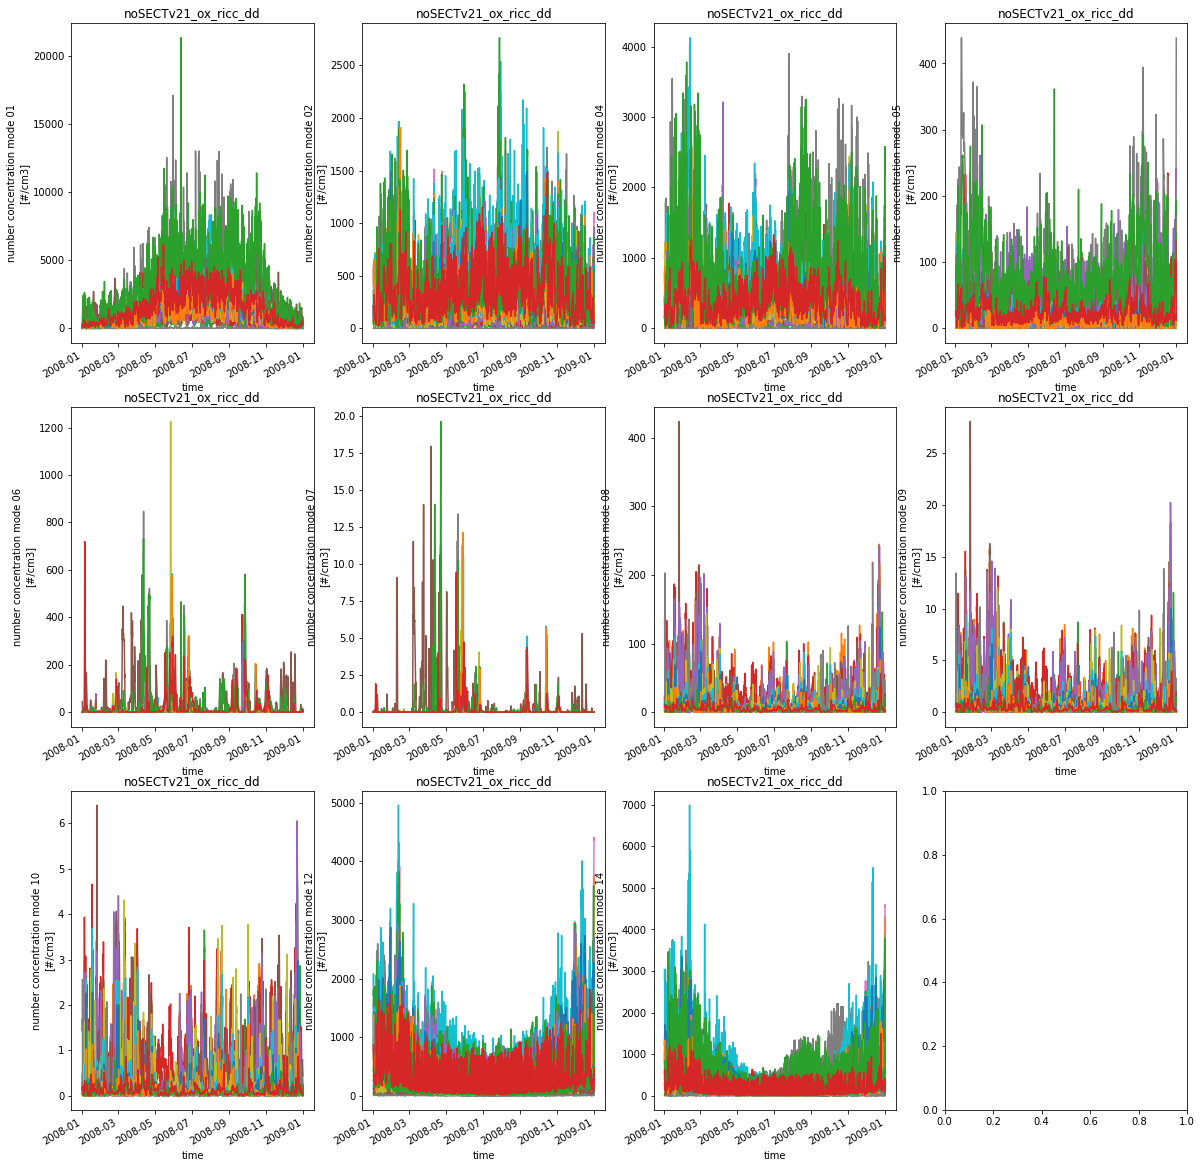

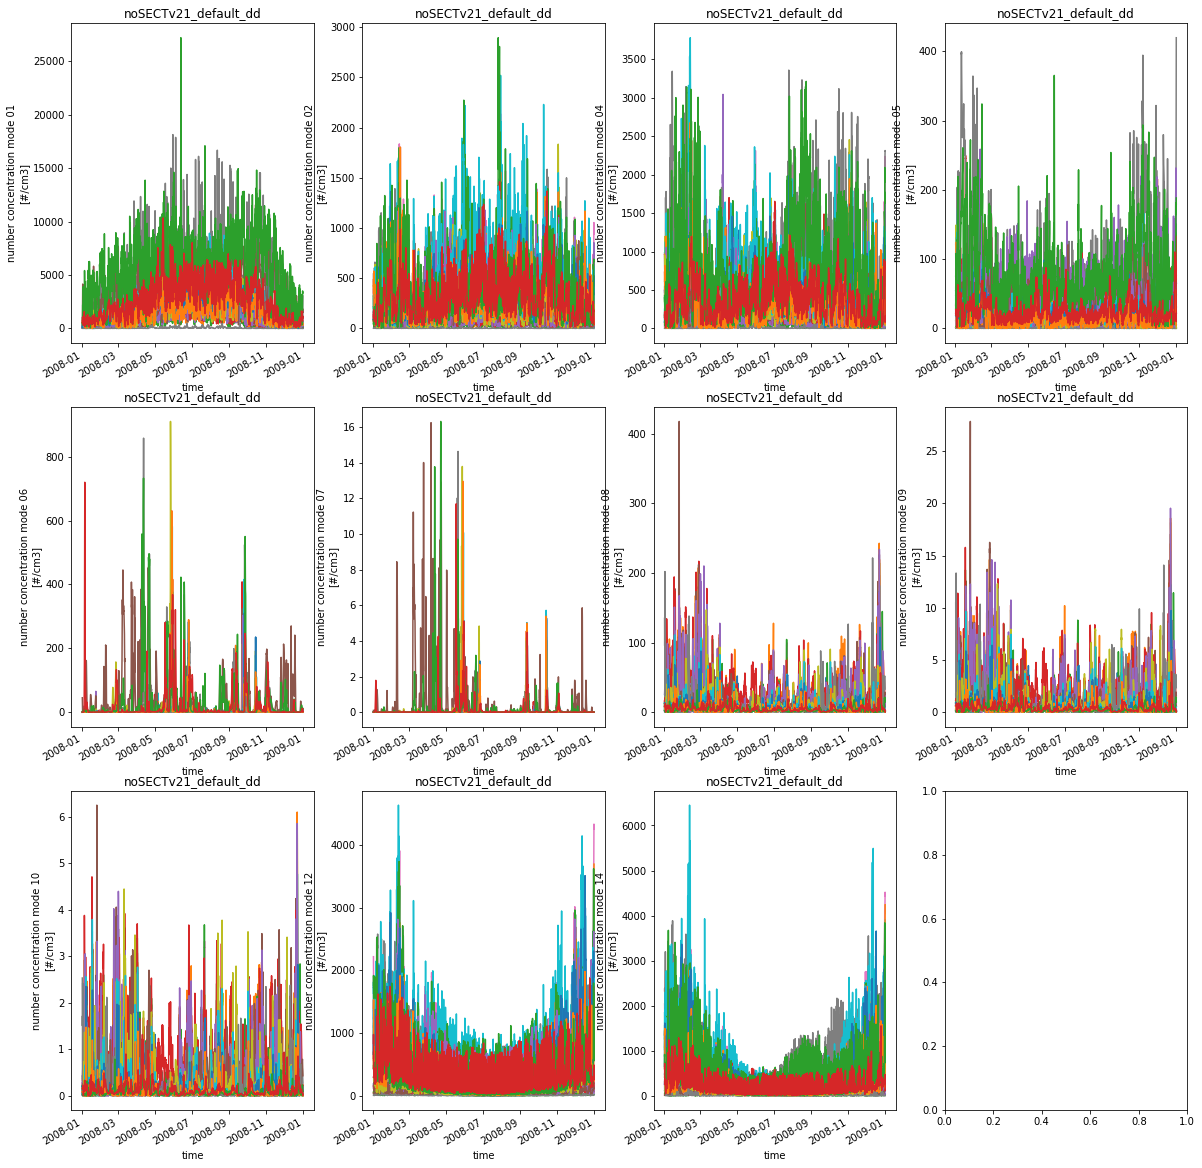

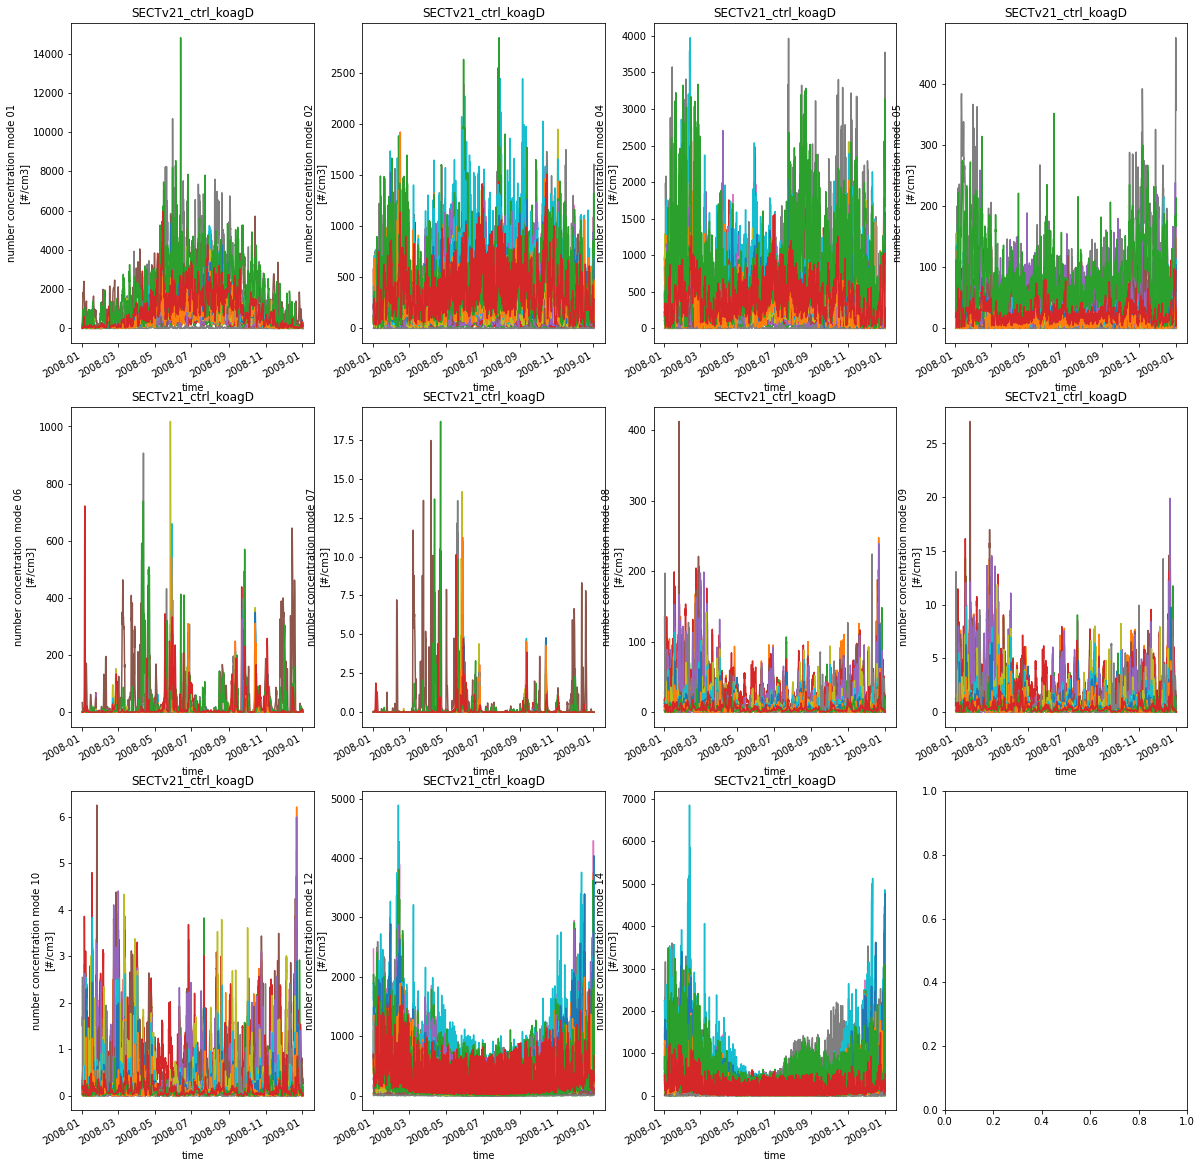

In [7]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['NCONC'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

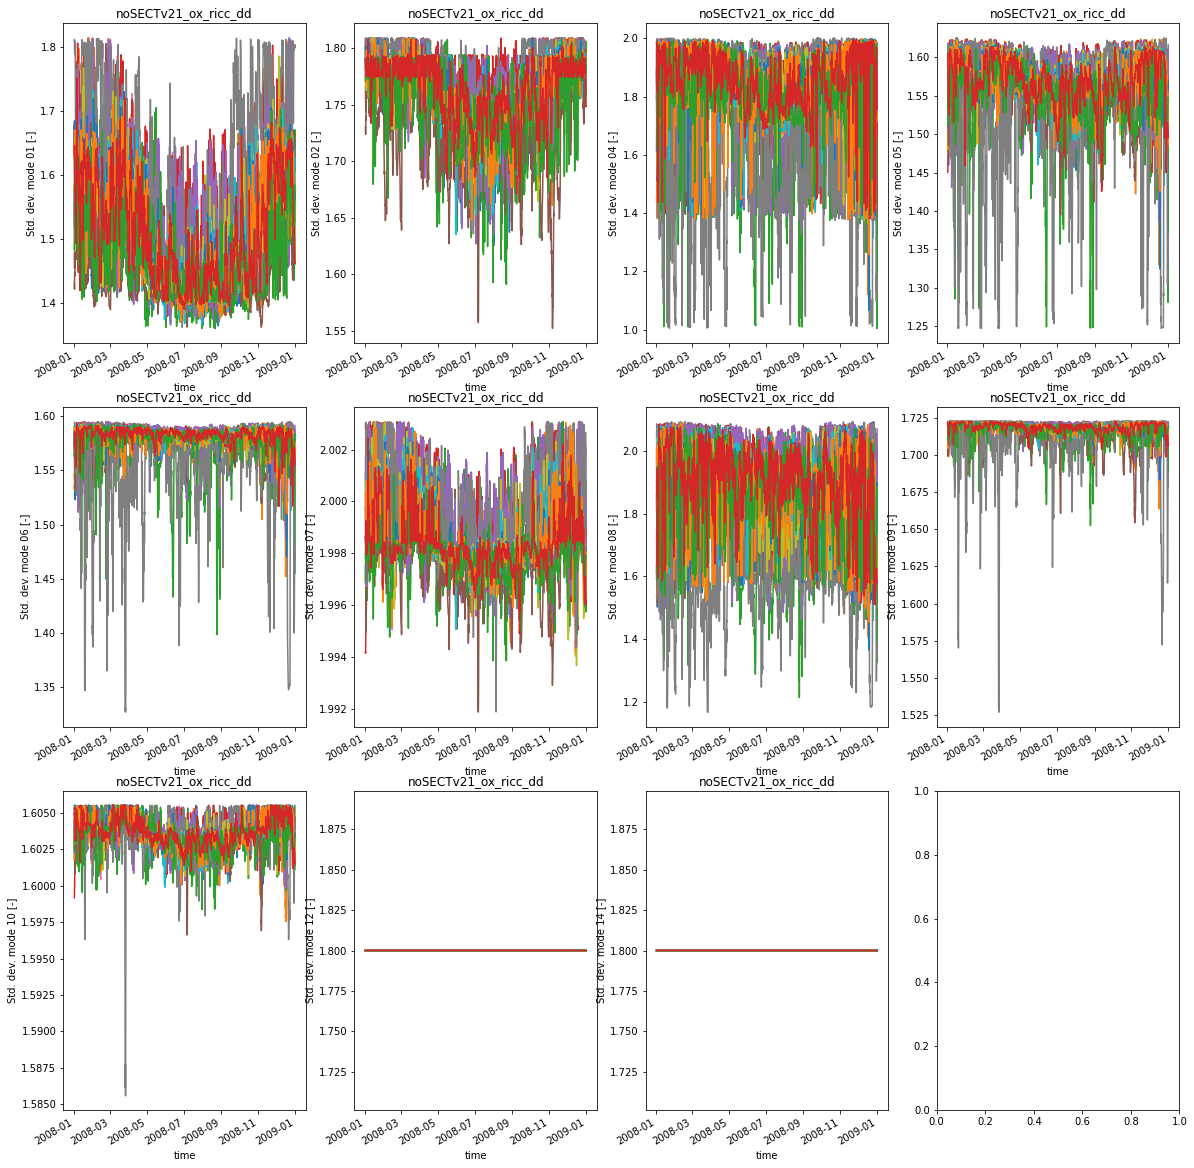

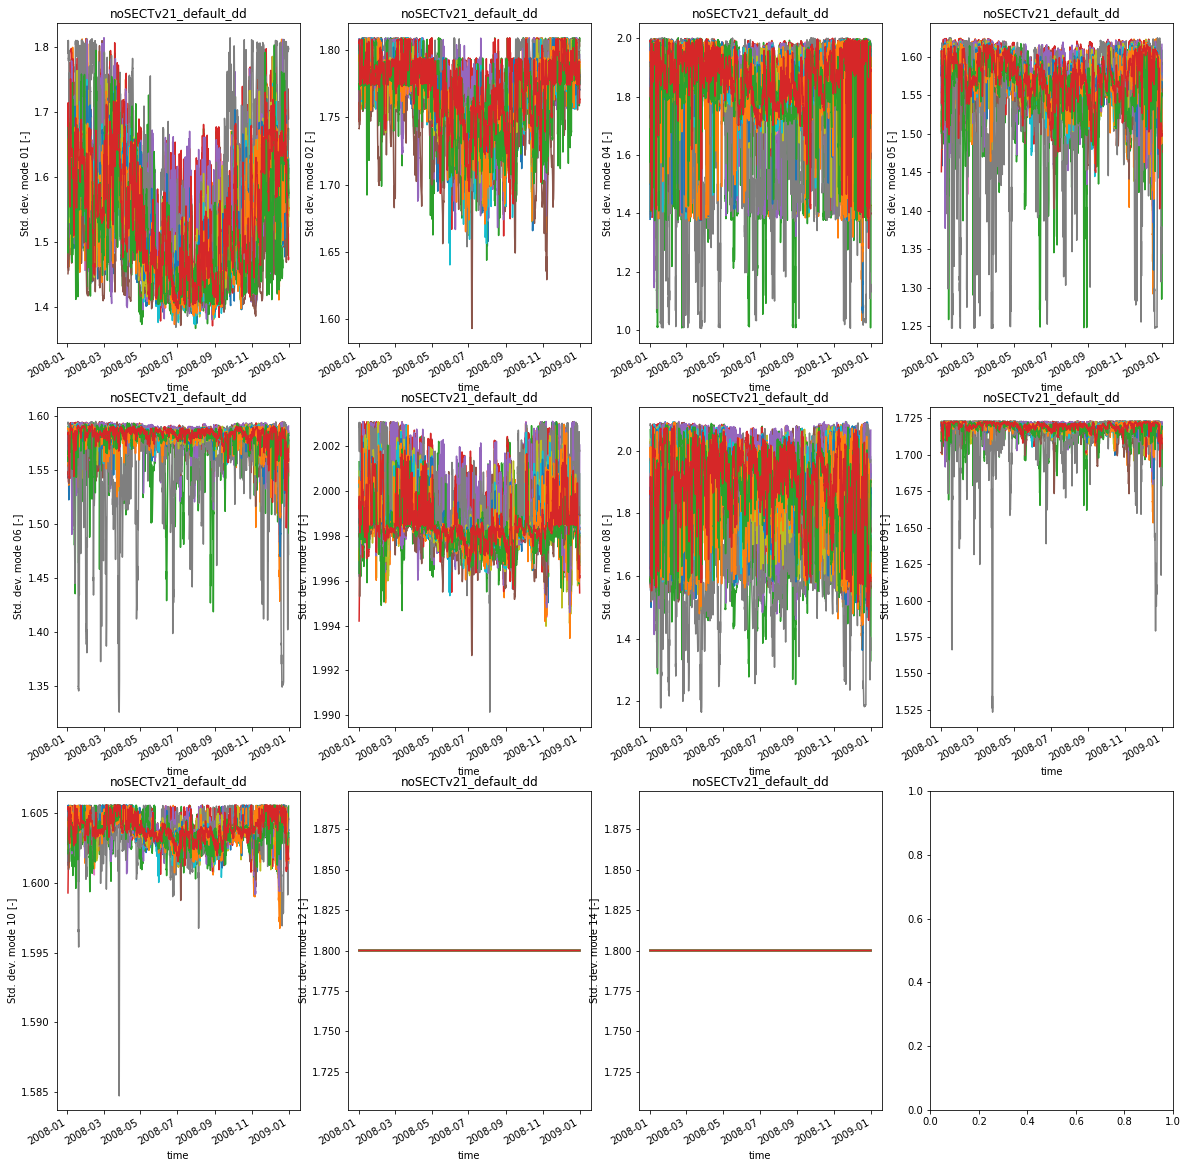

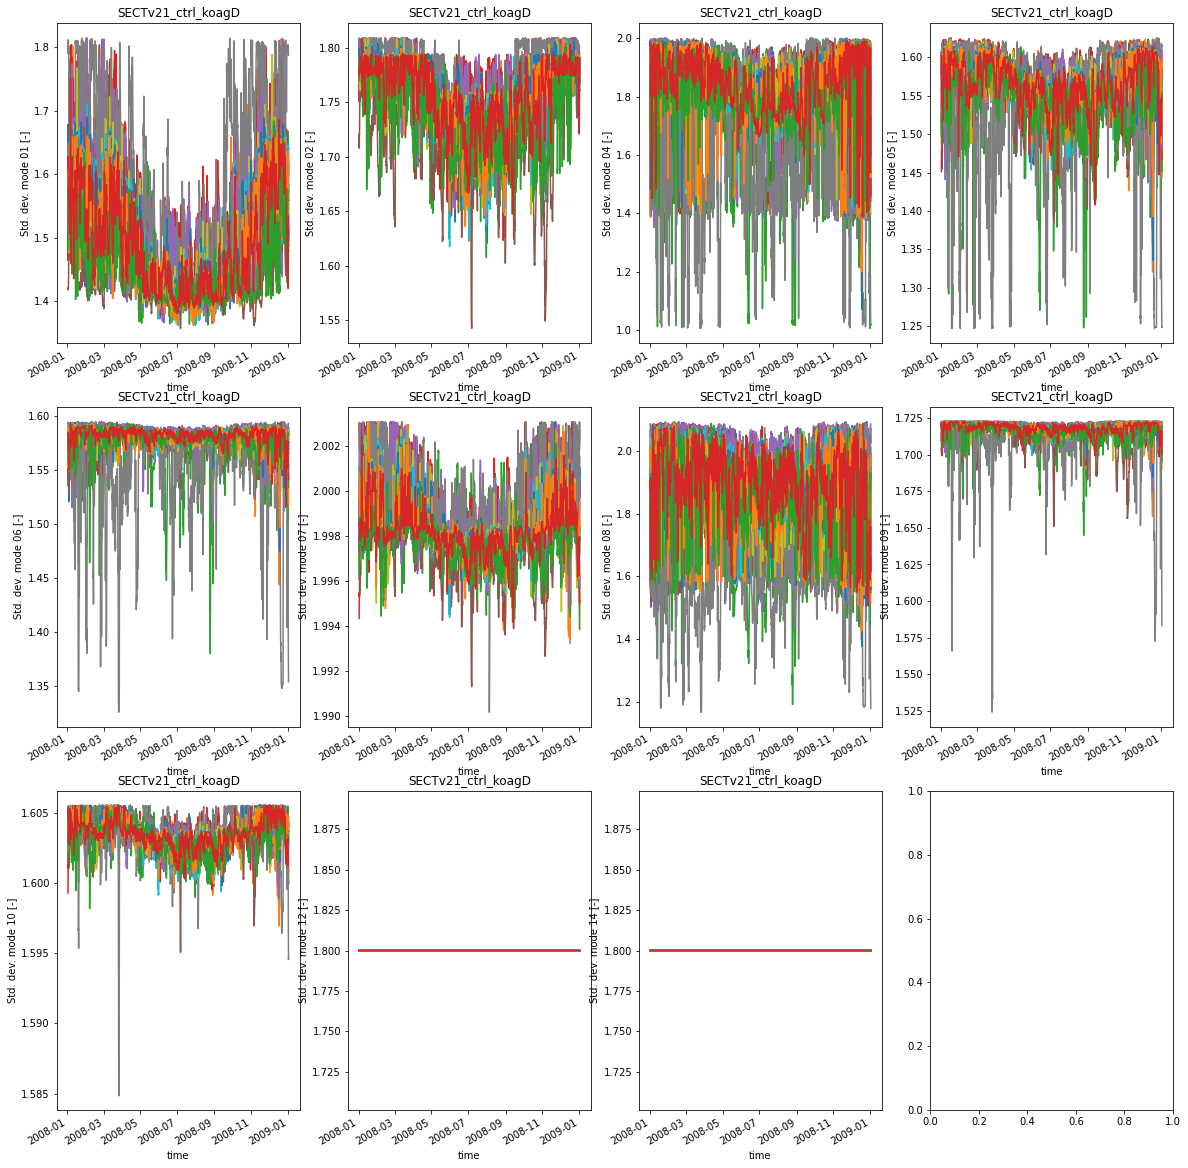

In [8]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['SIGMA'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

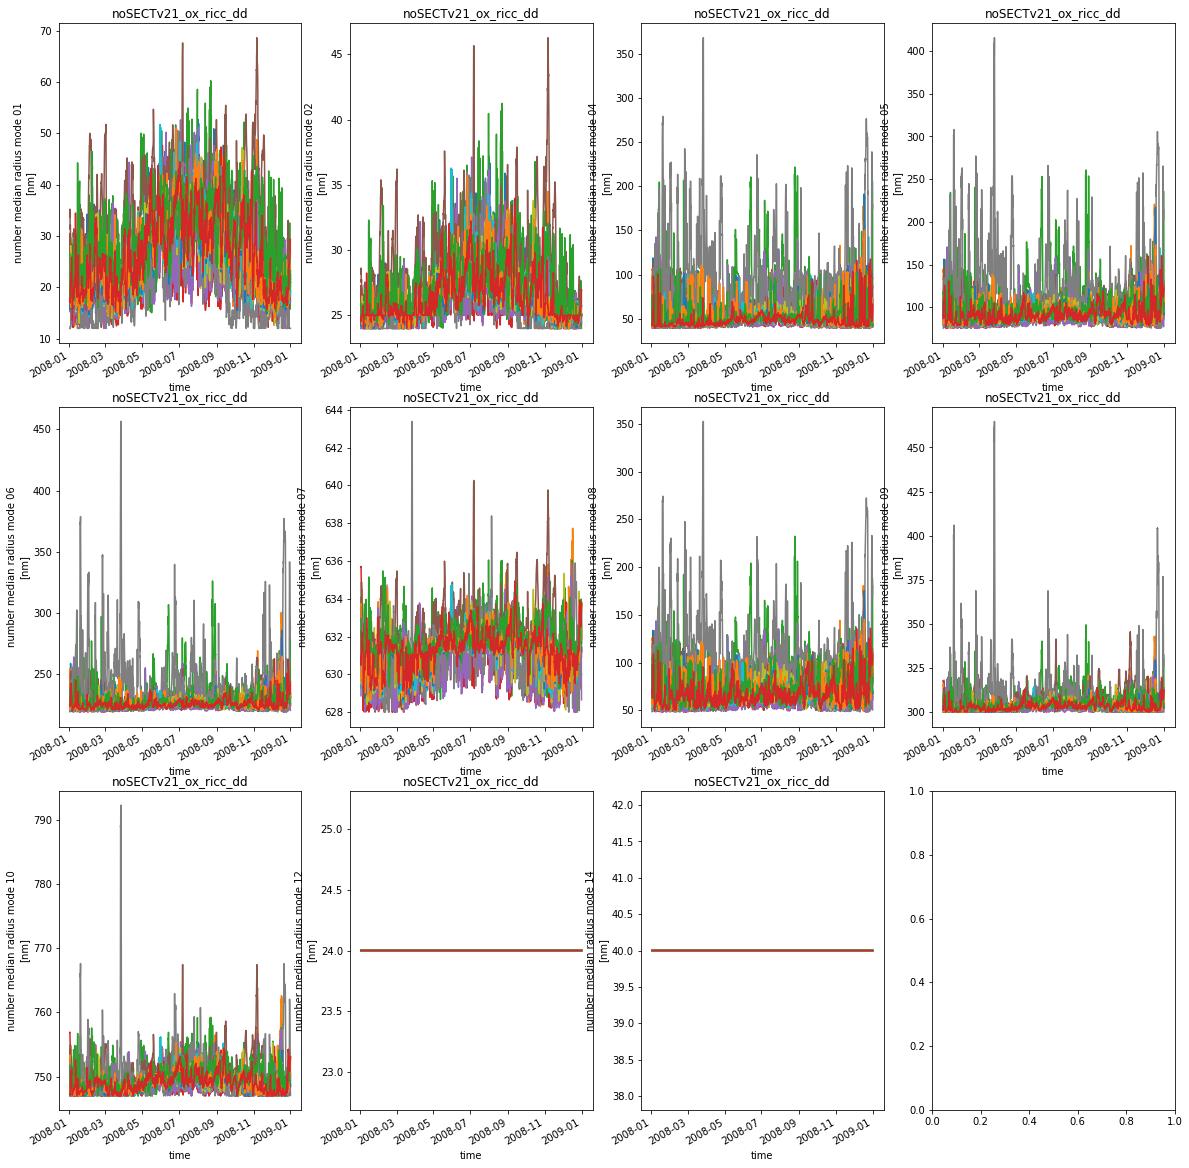

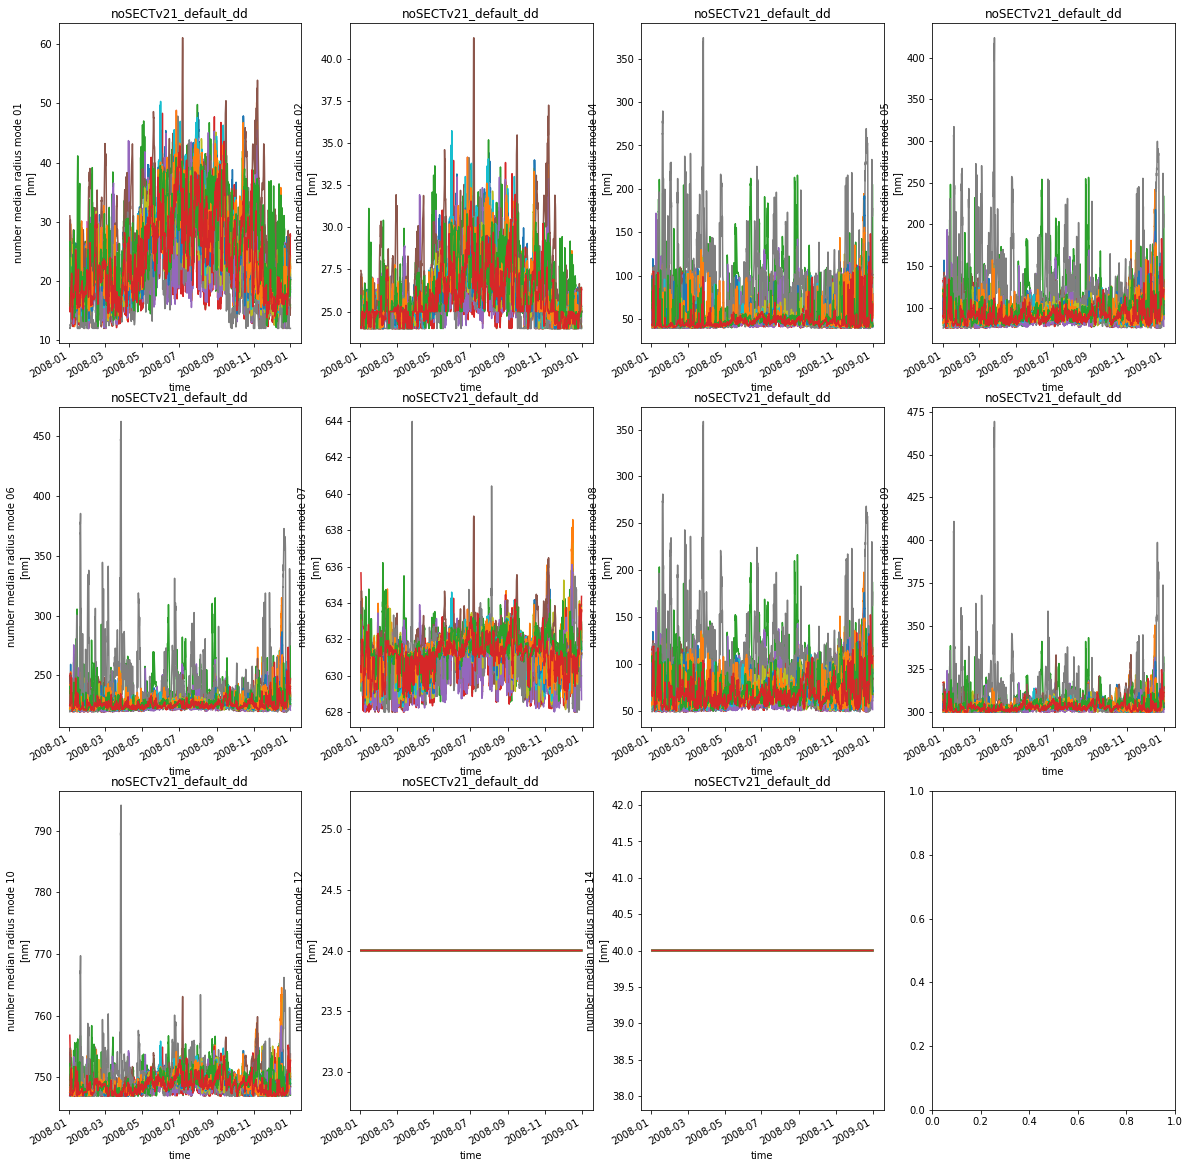

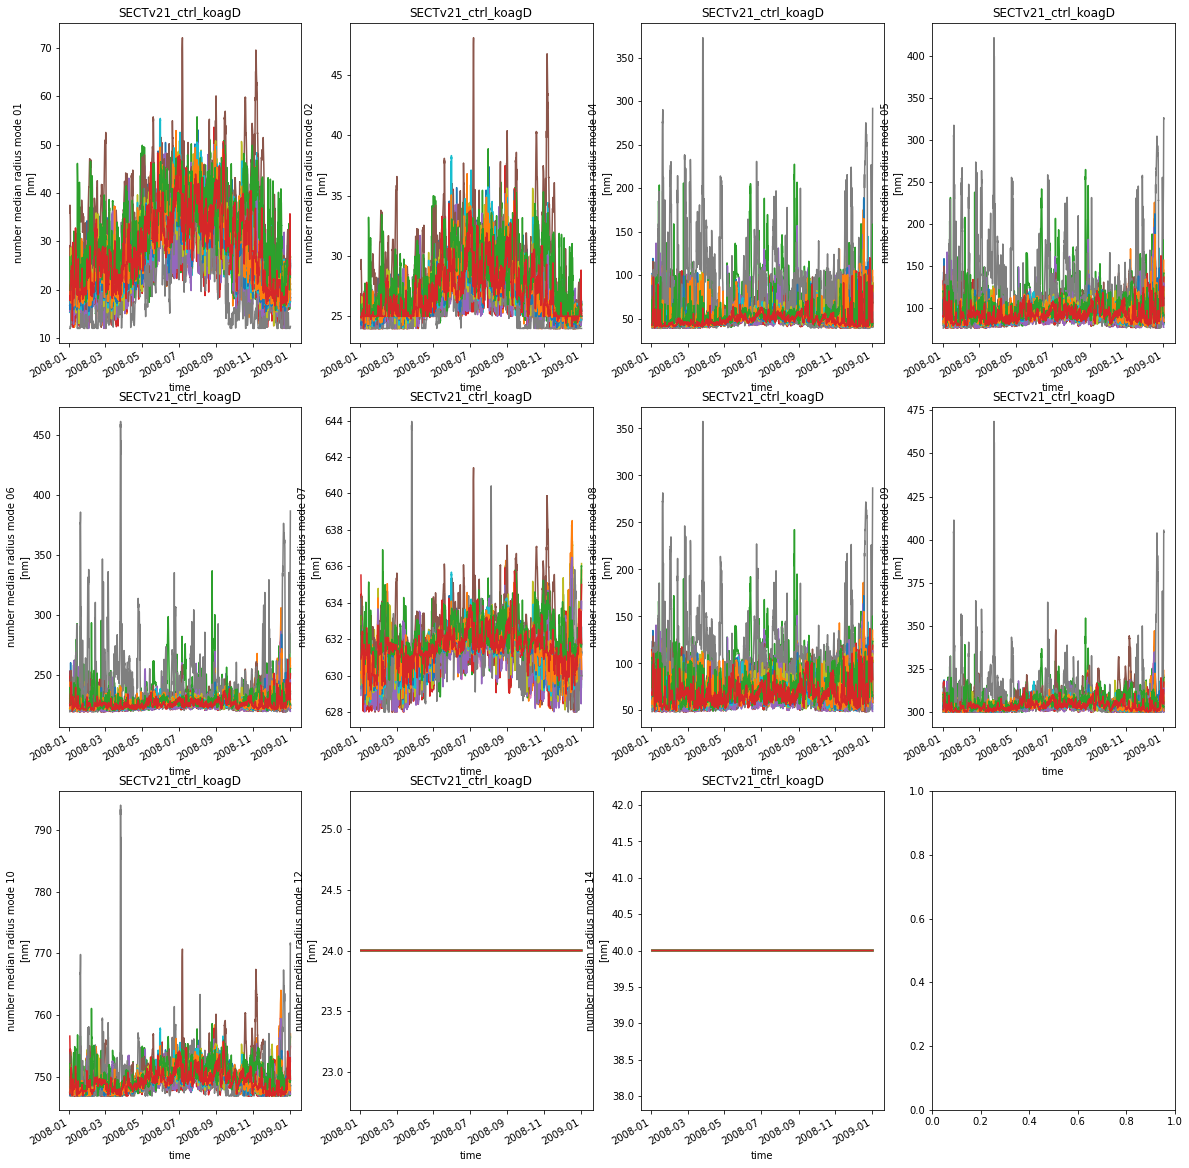

In [9]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['NMR'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

# 2009-2010

In [10]:
from_t = '2009-01-01'
to_t = '2010-01-01'

In [11]:
varl=sized_varListNorESM['NCONC']+sized_varListNorESM['NMR']+sized_varListNorESM['SIGMA']

In [12]:
#arl=['COAGNUCL','GR','GRSOA','GRH2SO4','NUCLRATE','FORMRATE','SO2', 'SOA_NA','SO4_NA', 'cb_SOA_NA','cb_SO4_NA','H2SO4','SOA_LV','SOA_SV', 'NCONC01','NMR01','SIGMA01']
ds_dic={}
for case_name in cases_sec:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour')
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour')
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a

    


/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC01_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC02_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC04_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC05_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC06_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC07_SECTv21_ctrl_koagD_2009-01-01_2010-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/proje

In [13]:
sized_varListNorESM['NCONC']

['NCONC01',
 'NCONC02',
 'NCONC04',
 'NCONC05',
 'NCONC06',
 'NCONC07',
 'NCONC08',
 'NCONC09',
 'NCONC10',
 'NCONC12',
 'NCONC14']

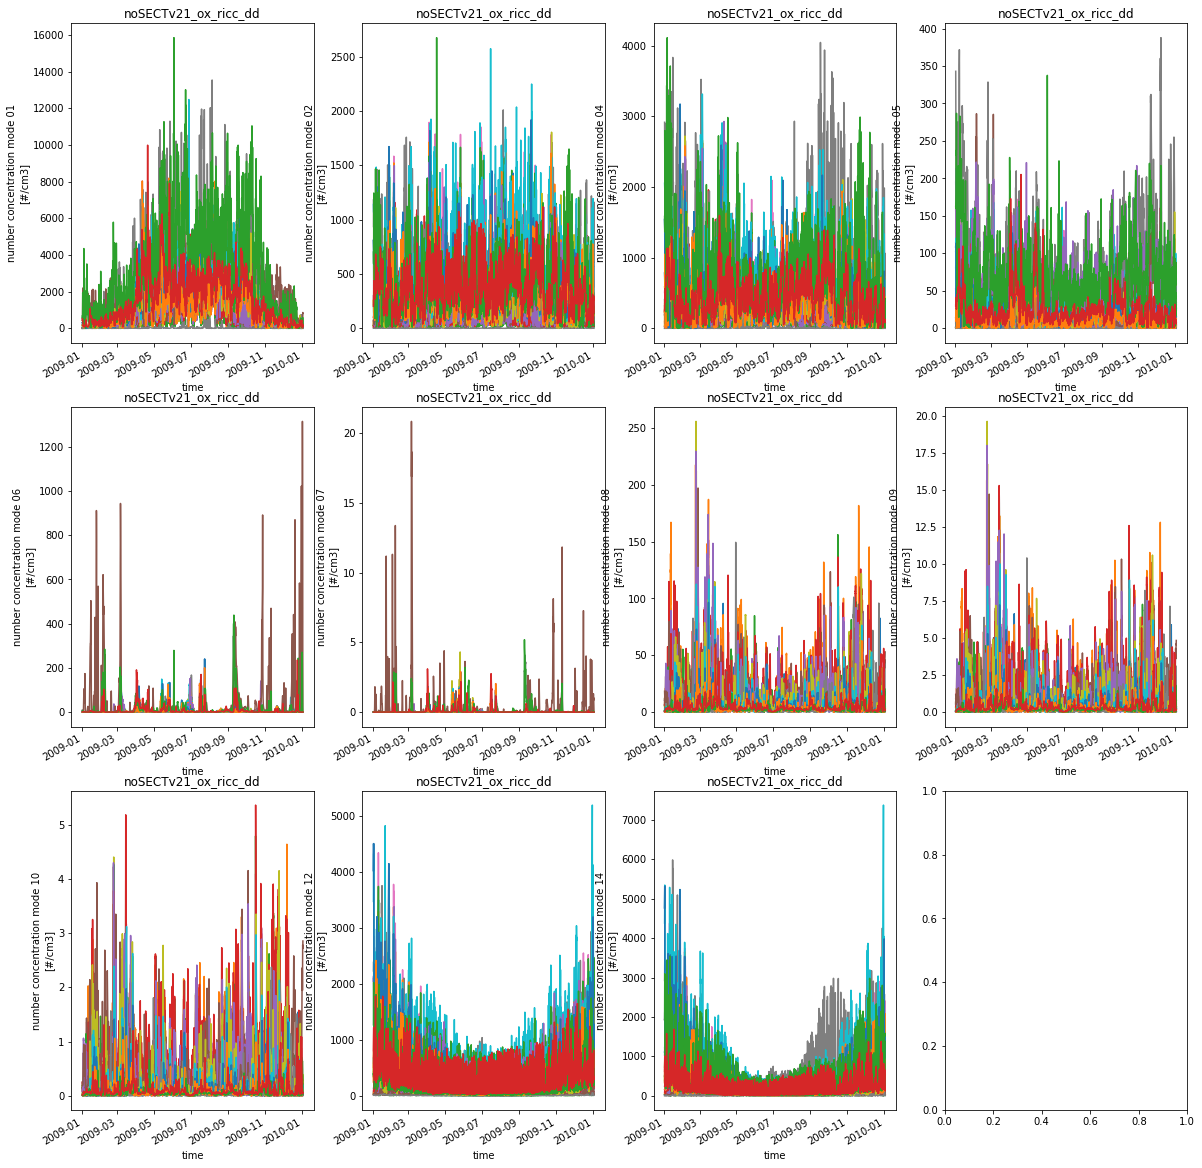

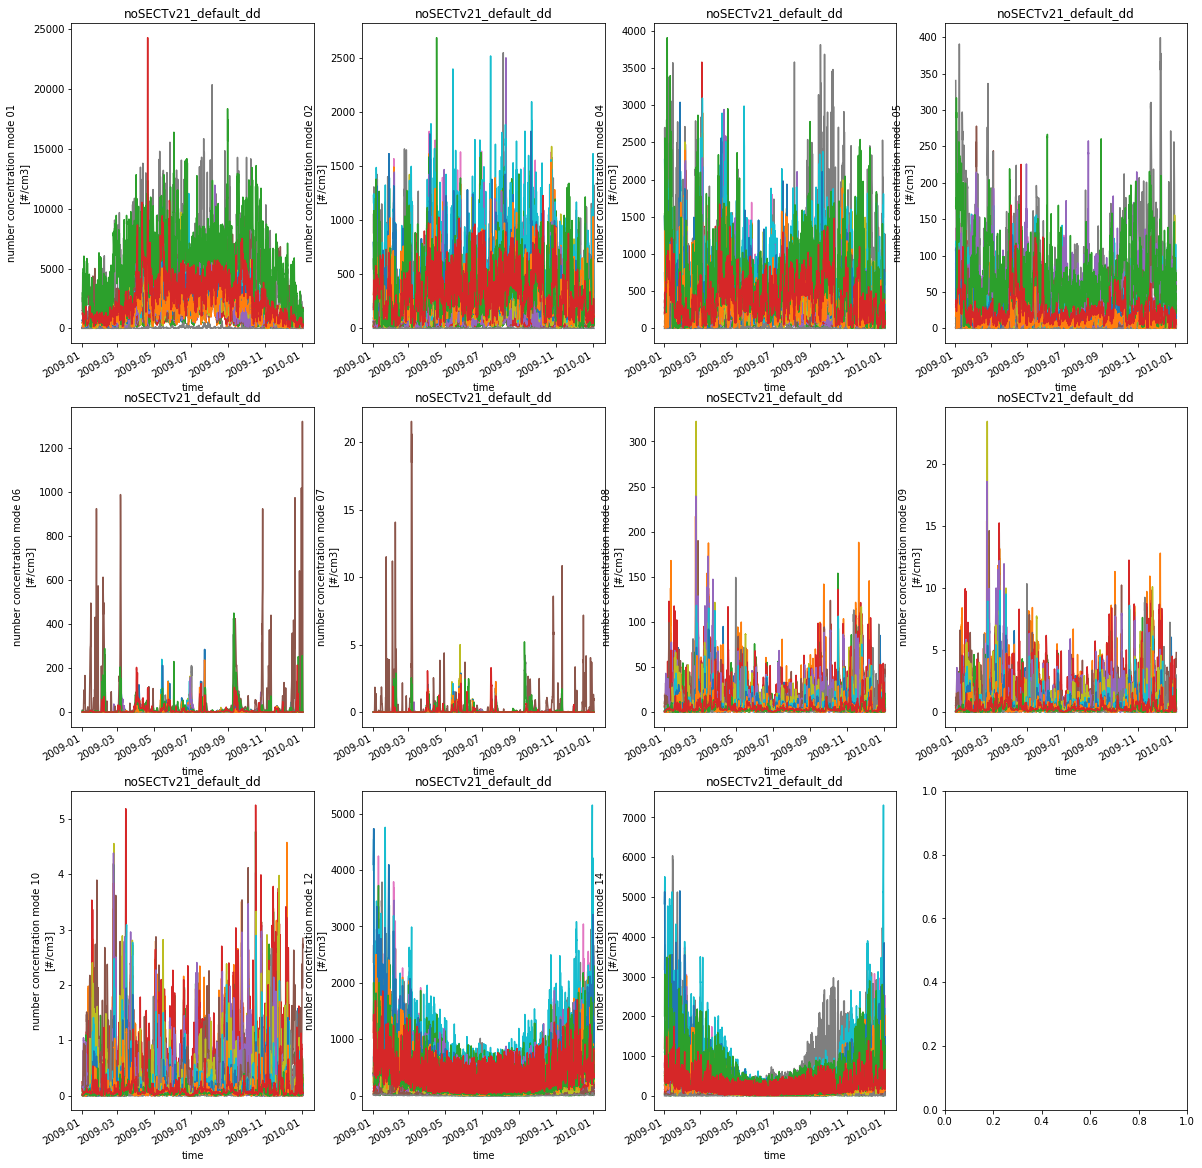

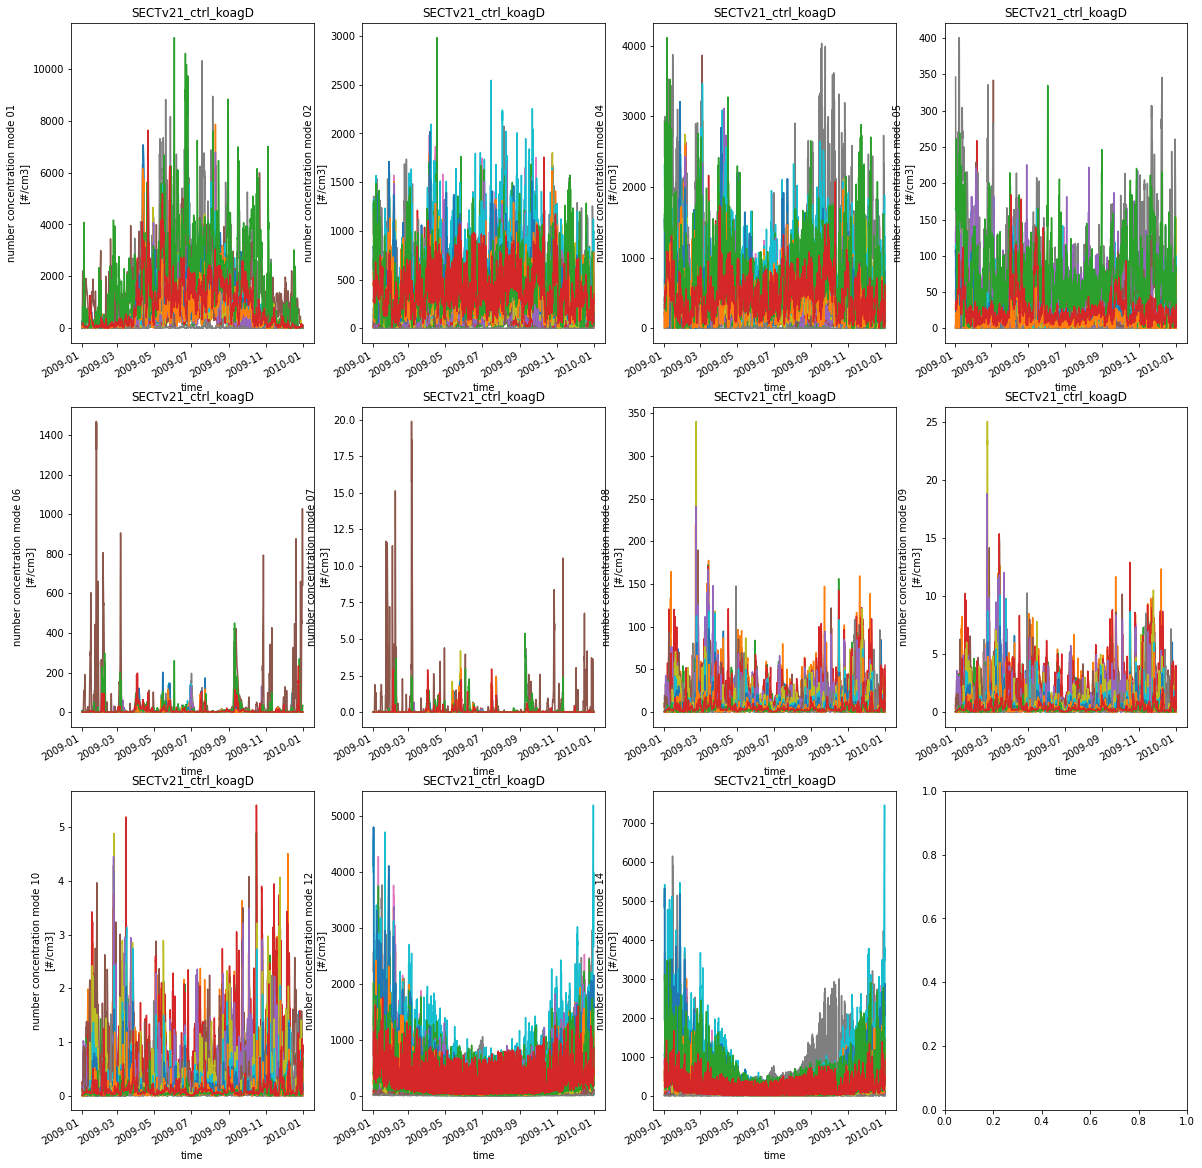

In [14]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['NCONC'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

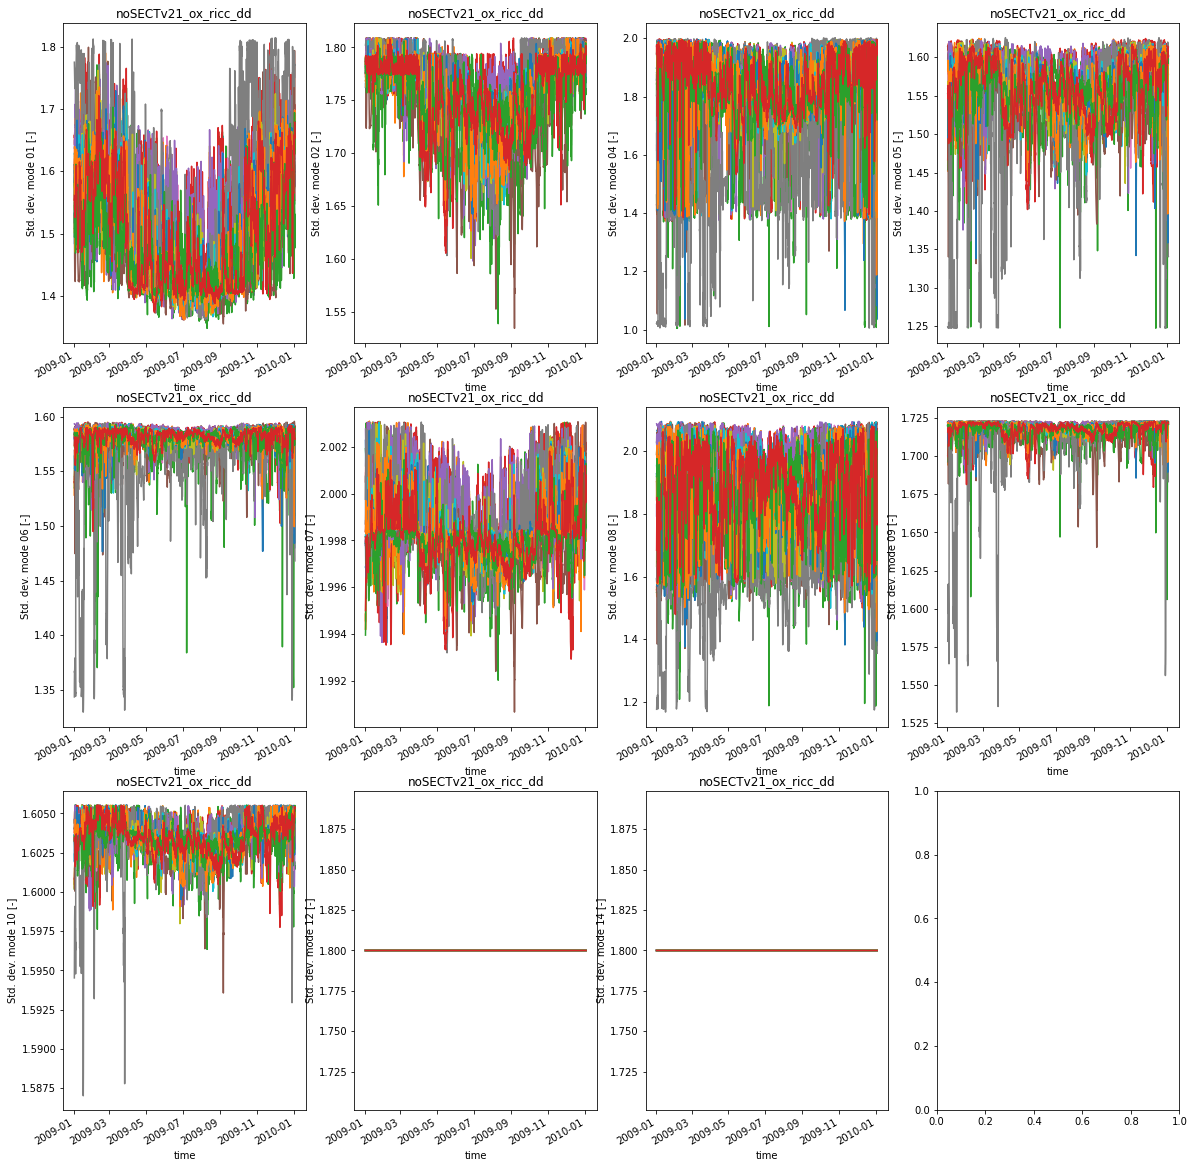

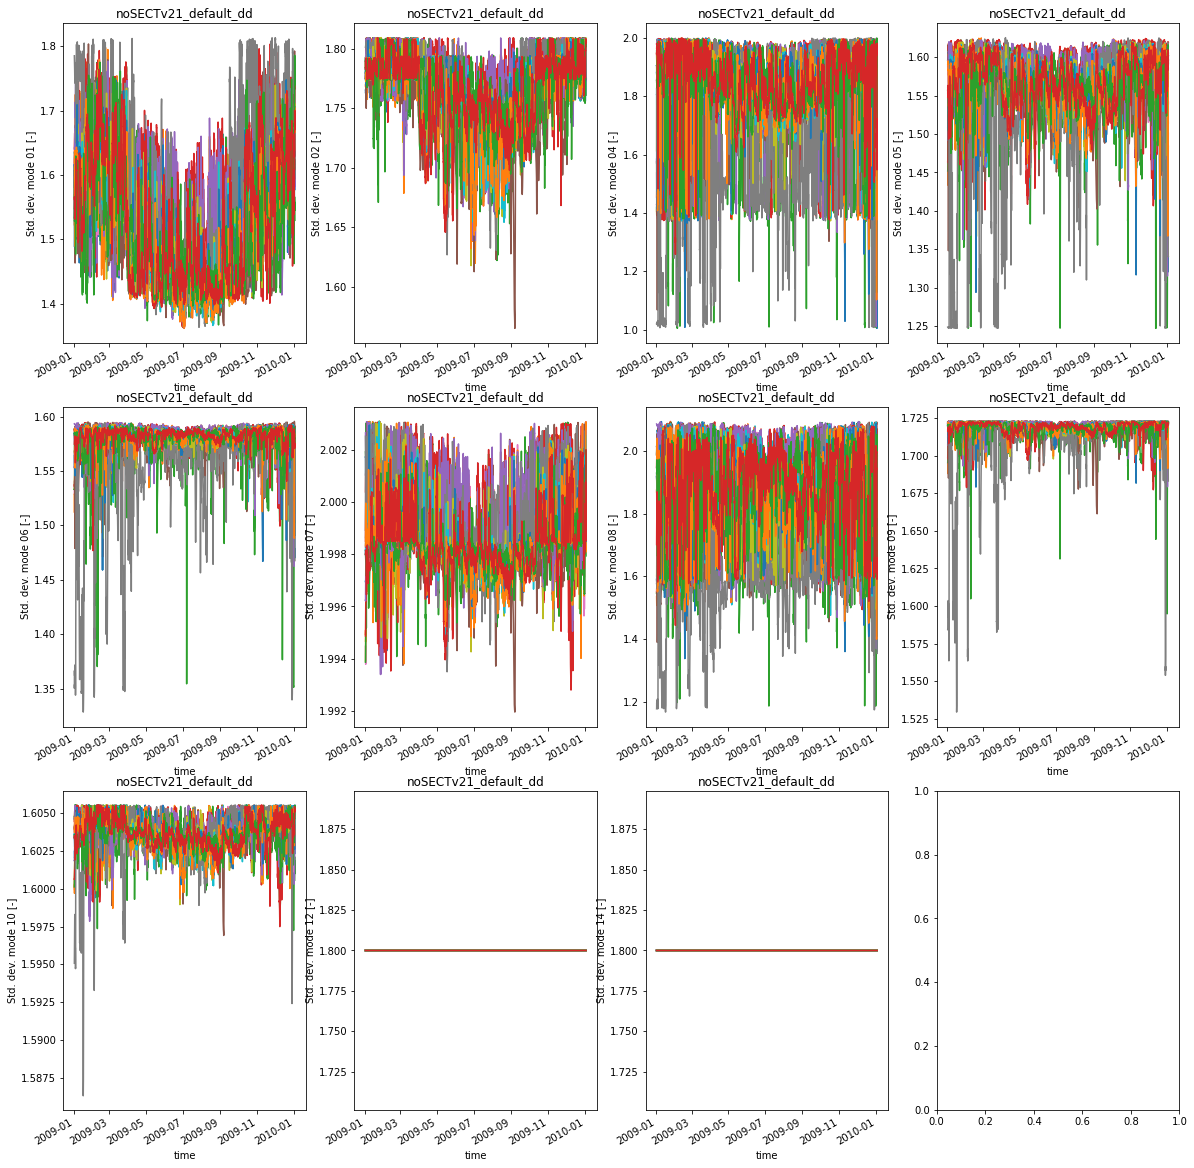

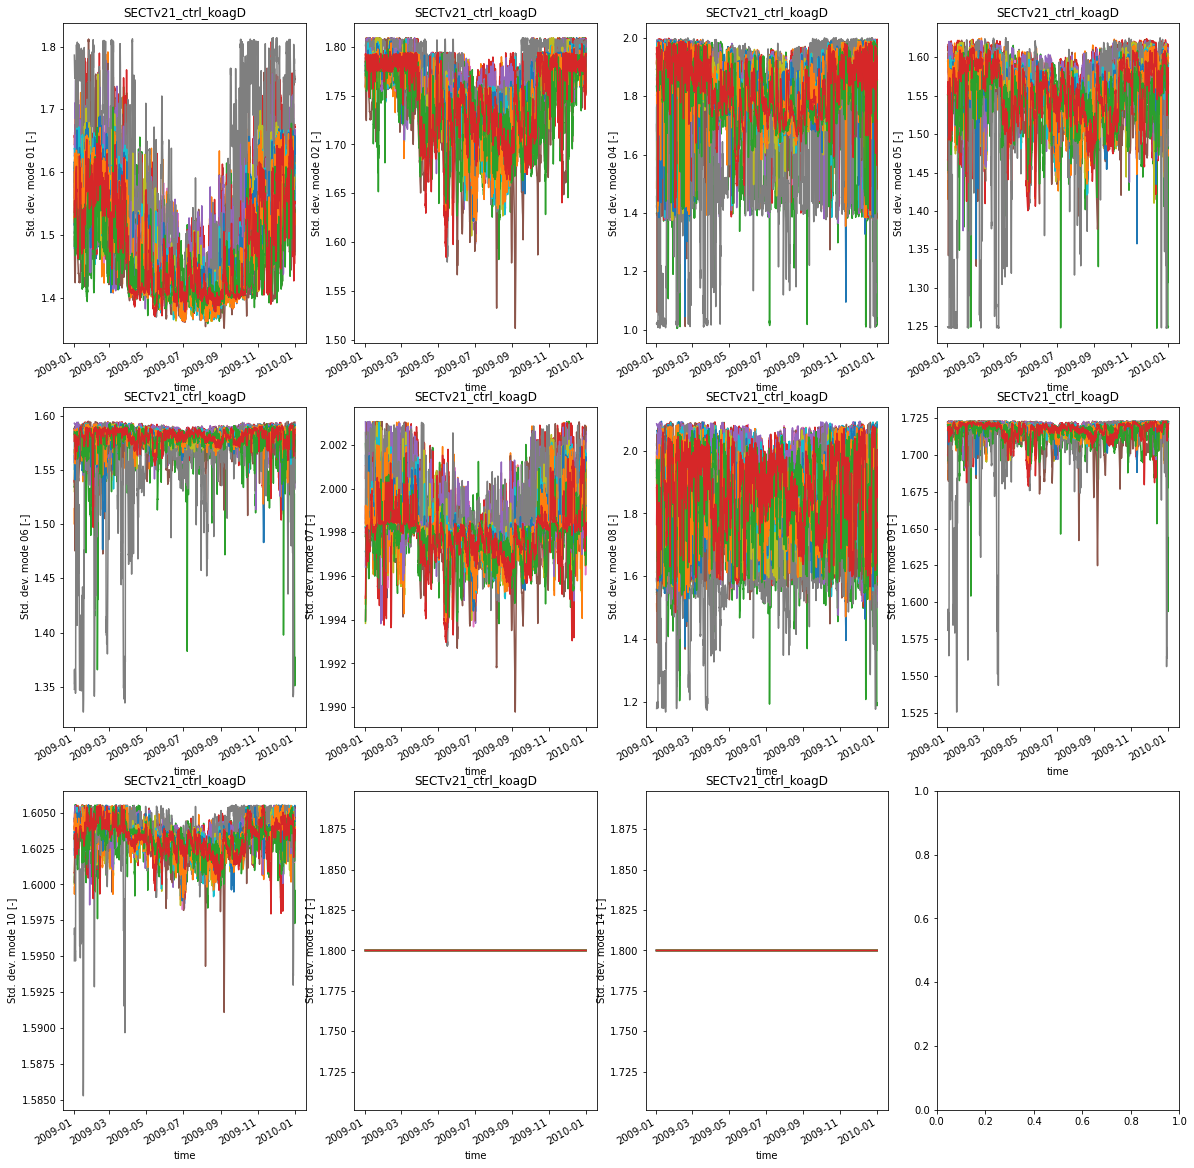

In [15]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['SIGMA'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

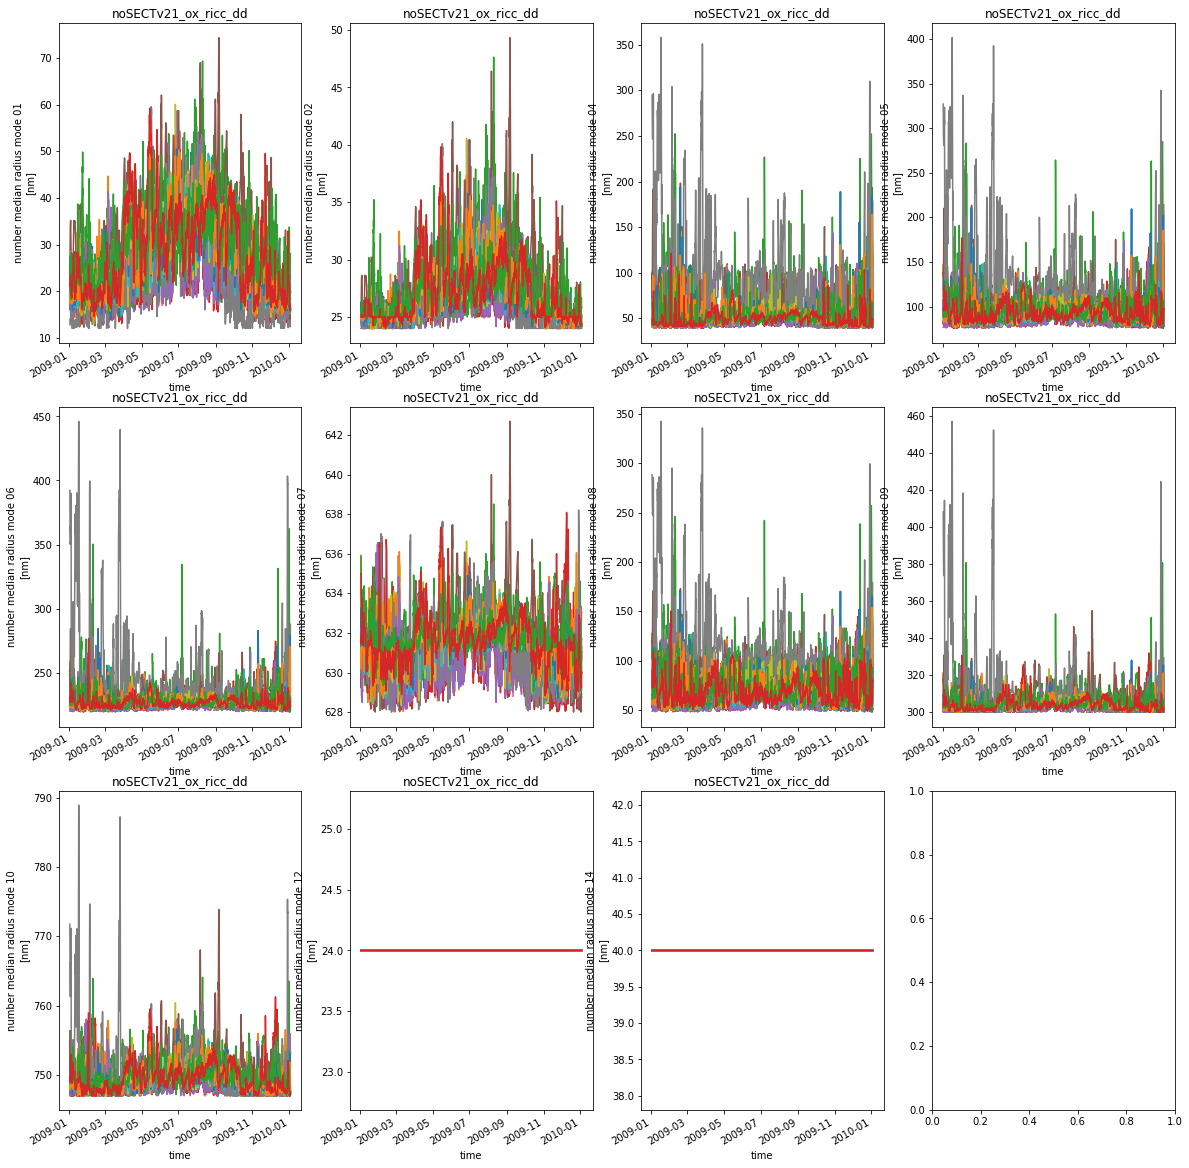

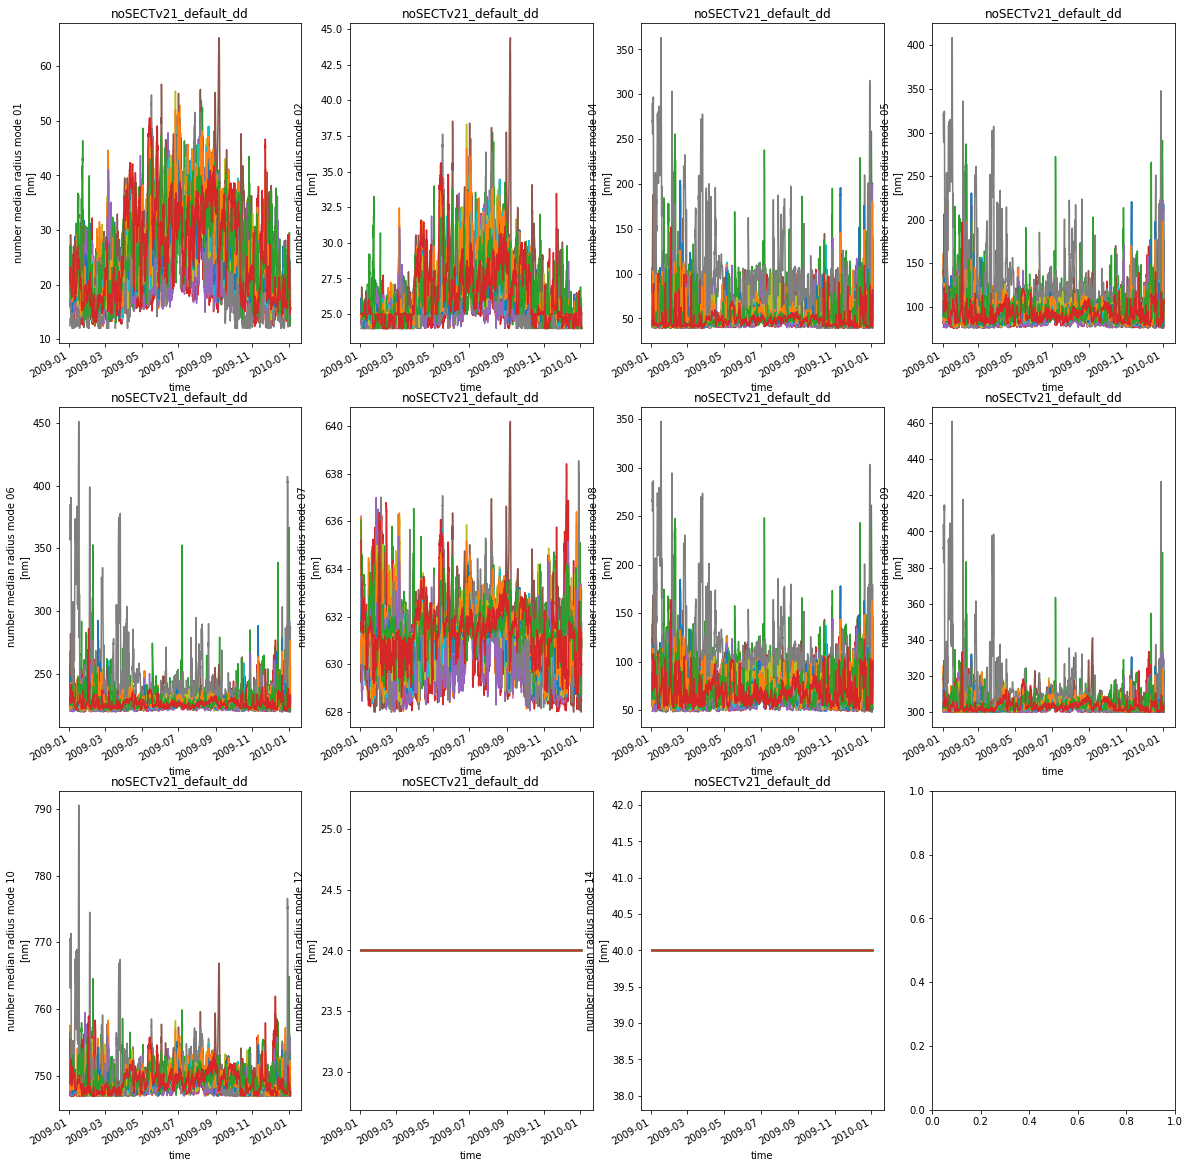

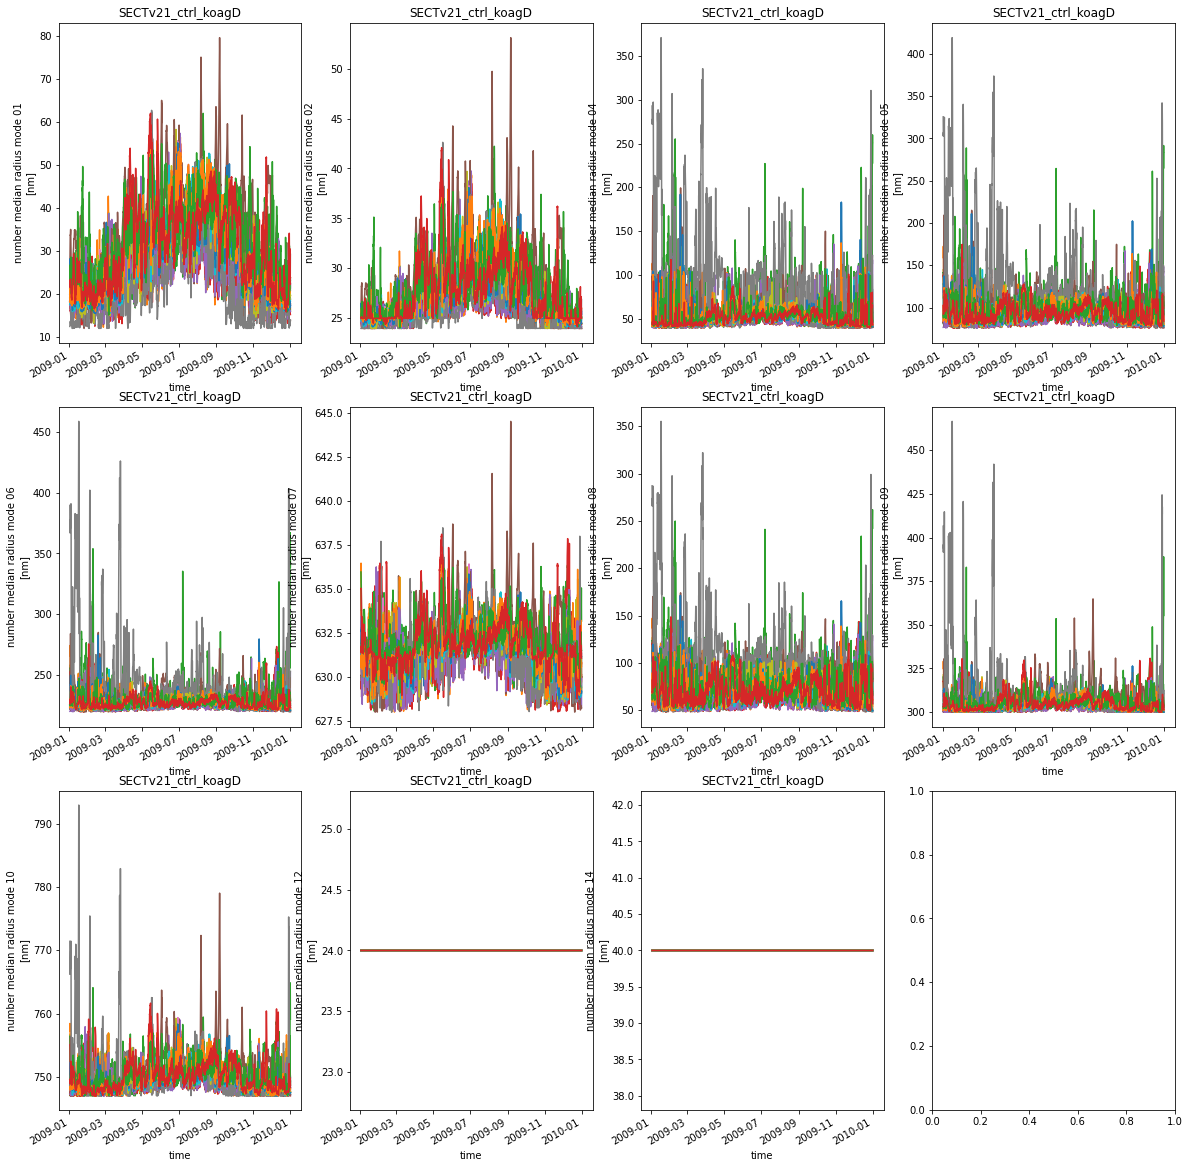

In [16]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(3,4, figsize=[20,20])
    for var, ax in zip(sized_varListNorESM['NMR'], axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()